In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [2]:
plt.style.use("seaborn-whitegrid")

C:\Users\buidi\AppData\Local\Temp\ipykernel_2276\3963306264.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Overview

- Data về housing prices tại các district trong California
- Observational units là district (not individual house)
- Real estate agent
- Regression (*)

## Predictive modeling
Define problem based on outcome

- Regression: housing price, salary, temperature, wind speed
- Classification: discrete/categorical (few distinct value)
    - Bad debt: good/bad (0/1) - Binary classification
    - Churn prediction: telco, subscription
    - Muticlass: predict professional (not common)

# Load and quick view data

In [4]:
# Load
df = pd.read_csv("D:\\data\\housing.csv")

## Inspect

In [5]:
# Shape
df.shape

(20640, 10)

In [6]:
# First rows
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### Terms
- `median_house_value`: outcome / target
- Other columns: features / attributes
- Feature engineering: design features

In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.isnull().mean() * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [9]:
# Investigate categorical columns
df["ocean_proximity"].value_counts(normalize=True) * 100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

# Exploratory Data Analysis (EDA)

In [10]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


## Investigate numeric variables

- Histogram / KDEs
- Boxplots
- Scatter plots

In [11]:
df_num = df.select_dtypes("number").copy()
df_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


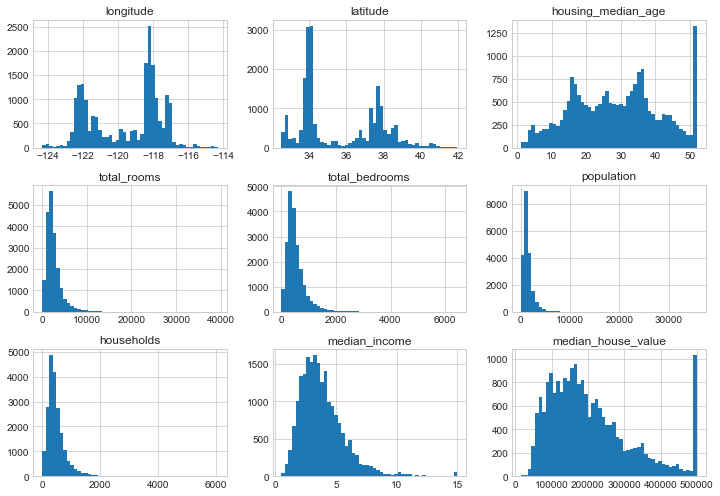

In [12]:
fig = plt.figure(figsize=(10, 7))

ncols = 3
nrows = np.ceil(df_num.shape[1] / ncols)

for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=50, ax=ax)
    
    # Decorate
    ax.set_title(c)
    ax.set_ylabel(None)
    
plt.tight_layout()
plt.show()

**Comments**:

- `housing_median_age`, `median_house_value` có vẻ bị capped ở bên phải (peak at the end)


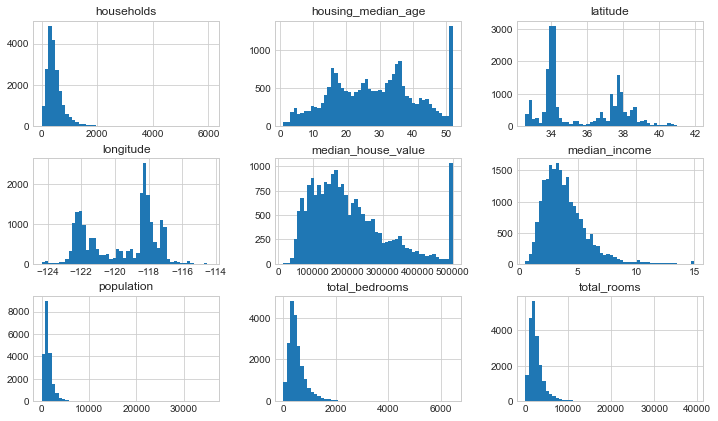

In [13]:
plt.rcParams["figure.figsize"] = (12, 7)
df_num.hist(bins=50)
plt.show()

## Plot satter plots

### Ver 1

In [14]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


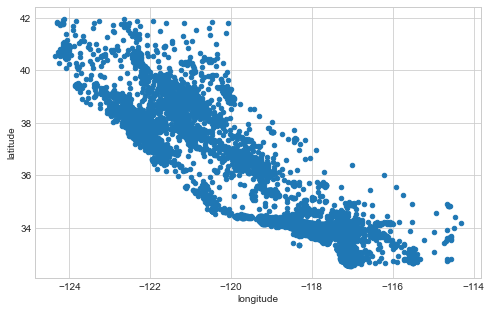

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
df.plot.scatter(x="longitude", y="latitude", ax=ax)
plt.show()

Scatter plot customization:

- Point shape, size, color, opacity
- Line linestyle, linewidth, color, opacity

### Ver 2
- Set alpha để giảm density

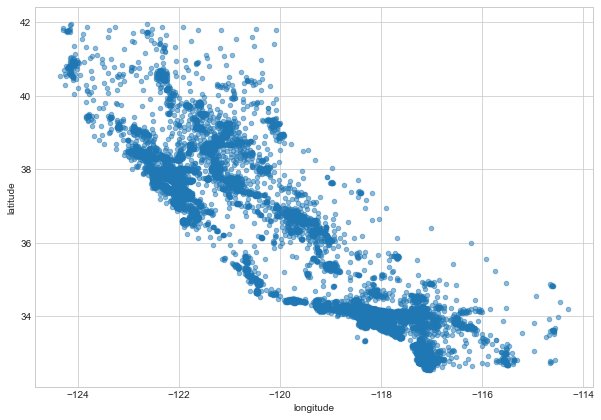

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))
df.plot.scatter(
    x="longitude", 
    y="latitude", 
    alpha=.5, 
    ax=ax
)
plt.show()

### Ver 3
- Thể hiện population qua size

In [17]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


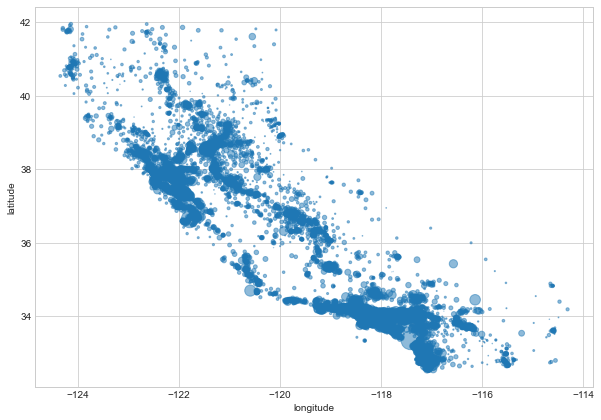

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))

df.plot.scatter(
    x="longitude", 
    y="latitude", 
    alpha=.5, 
    s=df["population"] / 100, # Size
    ax=ax
)

plt.show()

### Ver 4
- Thêm màu sắc thể hiện housing prices

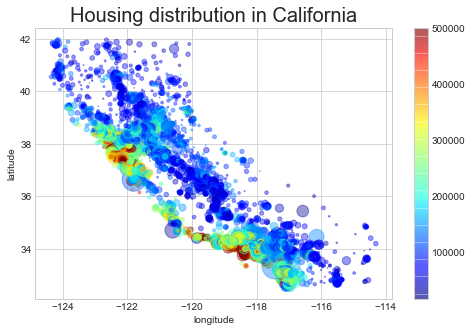

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

df.plot.scatter(
    x="longitude", 
    y="latitude", 
    alpha=.4, 
    s=df["population"] / 50, 
    c=df['median_house_value'],
    cmap=plt.get_cmap("jet"),
    ax=ax
)

ax.set_title("Housing distribution in California", fontsize=20)

plt.show()

**Remarks**:

- Giá nhà có liên quan chặt chẽ vị trí gần biển hay không (trừ khu vực phía Bắc California - possible reason: cold weather)
    - Đông dân có xu hướng giá cao hơn
    - Gần biển có xu hướng giá cao hơn

## Scatter plots of other variables with house values

In [20]:
cols = [
    "longitude",
    "latitude",
    "housing_median_age", 
    "total_rooms", 
    "total_bedrooms", 
    "median_income", 
    "median_house_value"
]

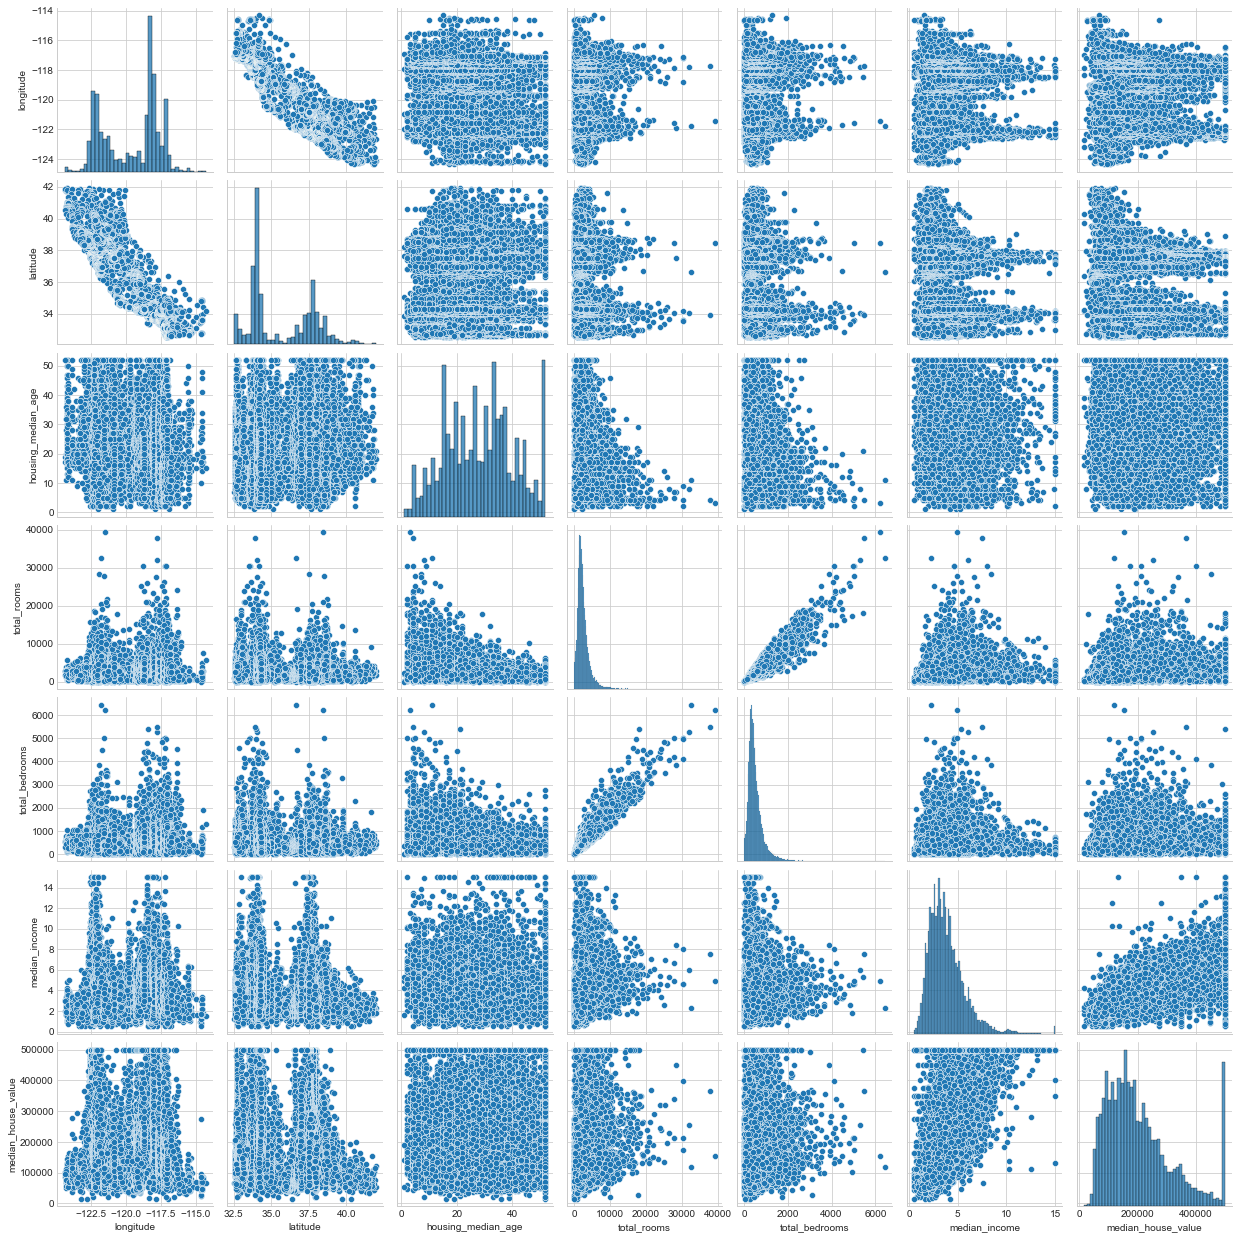

In [21]:
sns.pairplot(df[cols])
plt.show()

**Remarks**

- `median_income`, `total_rooms`, `total_bedroms` seems to be good predictors for housing prices
- `total_rooms` and `total_bedrooms` are strongly correlated -> combine them?


## Zoom in median_income vs median_house_value

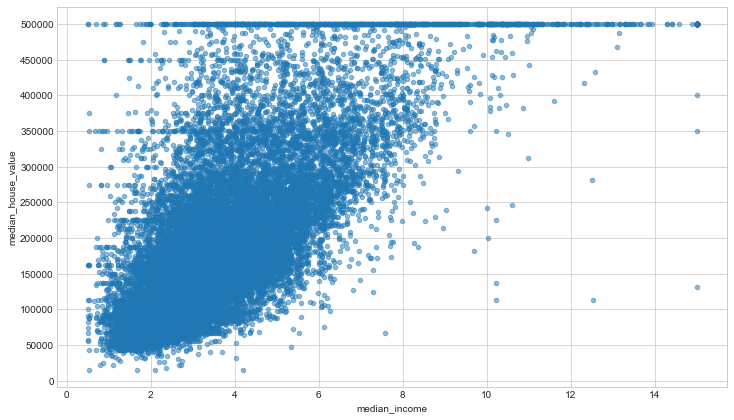

In [22]:
fig, ax = plt.subplots()

df.plot.scatter(
    x="median_income", 
    y="median_house_value", 
    alpha=.5, 
    ax=ax
)

max_price = df["median_house_value"].max()
yticks = np.arange(0, max_price, 50000)
ax.set_yticks(yticks)

plt.show()

**Remarks**:
- Data seem to be capped at 500000
- Solution: 
    - Remove those points
    - Or research and obtain the accurate price

## Correlation

In [23]:
df.corr()["median_house_value"]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [24]:
df.corr()["median_house_value"].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

## Derive features

1. rooms per household
2. bedrooms per room
3. population per household

In [25]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [26]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260


Review correlation

In [27]:
df.corr()["median_house_value"].abs().sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
bedrooms_per_room           0.255880
rooms_per_household         0.151948
latitude                    0.144160
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
longitude                   0.045967
population                  0.024650
population_per_household    0.023737
Name: median_house_value, dtype: float64

In [28]:
df.corr()["median_house_value"]

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049686
population                 -0.024650
households                  0.065843
median_income               0.688075
median_house_value          1.000000
rooms_per_household         0.151948
bedrooms_per_room          -0.255880
population_per_household   -0.023737
Name: median_house_value, dtype: float64

**Remarks**:
- `rooms_per_household` and `bedrooms_per_room` have better correlation with `median_house_value` than `total_rooms` and `total_bedrooms`

## Investigate null data

In [29]:
df.isnull().mean()

longitude                   0.000000
latitude                    0.000000
housing_median_age          0.000000
total_rooms                 0.000000
total_bedrooms              0.010029
population                  0.000000
households                  0.000000
median_income               0.000000
median_house_value          0.000000
ocean_proximity             0.000000
rooms_per_household         0.000000
bedrooms_per_room           0.010029
population_per_household    0.000000
dtype: float64

In [30]:
null_data = df.loc[df["total_bedrooms"].isnull() == True, :].copy()

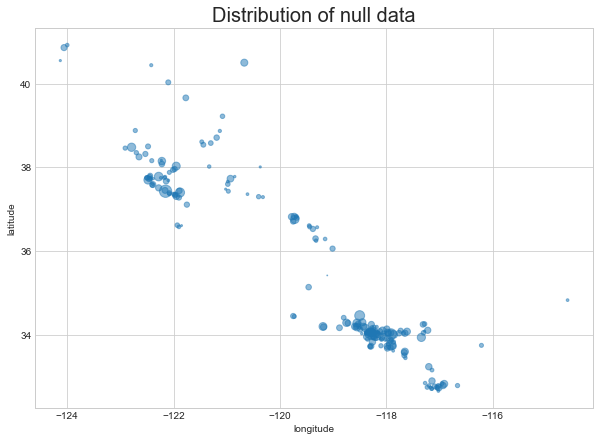

In [31]:
fig, ax = plt.subplots(figsize=(10, 7))

null_data.plot.scatter(
    x="longitude", 
    y="latitude", 
    alpha=.5, 
    s=null_data["population"] / 50, 
    ax=ax
)

ax.set_title("Distribution of null data", fontsize=20)

plt.show()

**Remarks**:

- No clear patterns

# Preprocess data to train the model

## Remove NA

- Other consideration: imputation with median values

In [32]:
# Read
df = pd.read_csv("data/housing.csv")

In [33]:
# Head
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [34]:
# Drop NA
df.dropna(how="any", inplace=True)

In [35]:
# Check
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## One hot encoding `ocean_proximity`

In [36]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [37]:
ocean_data = pd.get_dummies(df["ocean_proximity"], drop_first=True)
ocean_data.head(2)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0


In [38]:
# Combine with the original data
df = df.join(ocean_data)
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0


In [39]:
# Remove column ocean_proximity
df.drop(columns=["ocean_proximity"], inplace=True)
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0


In [40]:
# Double check
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
INLAND                  uint8
ISLAND                  uint8
NEAR BAY                uint8
NEAR OCEAN              uint8
dtype: object

In [41]:
# Make sure there is no non-numeric columns
df.select_dtypes("O").columns.tolist()

[]

## Add features

In [42]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [43]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,8.288136,0.129516,2.802260


- Phase 1: load data, inspect, understand columns, null values, ...
- Phase 2: EDA: distribution columns
    - Univariate: 
        - Continous: hist, kde, boxplot, ...
        - Categorical: freq dist, barplot, ..
    - Bivariate: 
        - Cont-cont: scatter plot
        - Cat cont: hist, kde, boxplot (each level)
        - ....
    - Multivariate:
        - Custimization: color, size, shape, linestyle, opacity
    - Correlation
    - Feature engineer and test intuition
    - Note: takeways
- Phase 3: preprocess
    - missing value handling (drop, impute)
    - convert cat -> cont
    - normalize (log scale, ...)
- Phase 4: Modeling
    - Finalize a set features
    - Select a model
    - Train ....

## 3. Modeling

### Model
- model = simplified version of reality
- ```
    income = f(age, educ, exp)
    y = f(x1, x2, x3) = b0 + b1x1 + b2x2 + b3x3
    ```

### Train a model

- Step 1: Select algorithm (linear regression)
- Step 2: Feed data -> learned parameters
- Step 3: Evaluate (test on test data)

Train-test splitting:

    1. Train (80%) 
    2. Test (20%)

## Split train test

- Split input (X) and target (y)

In [44]:
# Head
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,6.238137,0.155797,2.109842


In [45]:
# Shape
df.shape

(20433, 16)

In [46]:
# Get features
# Exclude label
X = df.drop(columns=["median_house_value"]).copy()

In [47]:
X.shape

(20433, 15)

In [48]:
X.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0,6.238137,0.155797,2.109842


In [49]:
# Get labels
y = df["median_house_value"]

In [50]:
y.head(3)

0    452600.0
1    358500.0
2    352100.0
Name: median_house_value, dtype: float64

### Split train, test

- Train
- Test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=1
)

In [53]:
# Double check size
print(X_train.shape)
print(X_test.shape)

(15324, 15)
(5109, 15)


# Train model

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
# Initiate model
model_1 = LinearRegression()

In [56]:
# Train (fit data to the model to learn the parameters)
model_1.fit(X_train, y_train) # Inplace

LinearRegression()

### View the trained models

In [57]:
model_1.intercept_

-2471543.215882563

In [58]:
# Coefficients
model_1.coef_

array([-2.81366749e+04, -2.66744945e+04,  1.08013950e+03,  1.31670628e+00,
        1.53942179e+01, -3.87207335e+01,  1.03943834e+02,  4.09908119e+04,
       -3.42935300e+04,  1.38297215e+05, -3.07716603e+03,  4.49891289e+03,
        3.49849195e+03,  2.72566949e+05,  4.72397993e+01])

In [59]:
len(model_1.coef_)

15

- house_price = `-2471543.215882563 + -2.81366749e+04*longitude + -2.66744945e+04*latitude + .... + 4.72397993e+01 x15 `

### Make predictions using the trained model

In [60]:
# Predict
y_pred_1 = model_1.predict(X_test)

In [61]:
X_test.shape

(5109, 15)

In [62]:
# Preview first few predictions
y_pred_1[:5].tolist()

[382829.12476011366,
 275008.6987852324,
 154075.76898951363,
 358141.78210926754,
 53024.65269857831]

In [63]:
# Compare with actual label
y_test[:5].tolist()

[360900.0, 291500.0, 131300.0, 500001.0, 118800.0]

## Evaluate the model

### Model 0: AVG price
- Our best guess without building any model is the average price

#### RMSE - root mean square error

$$
\sqrt{\frac{1}{n} \Sigma((y_i - \hat{y_i})^2})
$$

#### Calculate manually

In [64]:
y_train.mean() # Best guess

206489.63697468024

In [65]:
# AVG model RMSE
y_pred_0 = np.full(y_test.shape, y_train.mean())

In [66]:
residuals_0 = y_test - y_pred_0
residuals_0[:10]

6715     154410.363025
4121      85010.363025
15433    -75189.636975
20272    293511.363025
11843    -87689.636975
1398     -16889.636975
1838     -43989.636975
1902     -71789.636975
18586    -14289.636975
11765    -27089.636975
Name: median_house_value, dtype: float64

In [67]:
# RMSE
np.sqrt(sum(residuals_0**2) / y_test.shape[0])

117054.0386977329

#### Calculate using sklearn

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
# For model 0
np.sqrt(mean_squared_error(y_test, y_pred_0))

117054.03869773263

In [71]:
# Residuals
print(residuals_0.abs().mean())
print(residuals_0.abs().std())

92090.95961121324
72262.88976047133


### Model 1: Linear Reg

In [72]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred_1))

67819.28235577866

- Better than model 0

In [73]:
# Residuals
y_pred_1 = model_1.predict(X_test)
residuals_1 = y_test - y_pred_1

In [74]:
# Residuals
print(residuals_1.abs().mean())
print(residuals_1.abs().std())

48932.68832184289
46962.52503718666


### Plots

In [75]:
y_pred_0

array([206489.63697468, 206489.63697468, 206489.63697468, ...,
       206489.63697468, 206489.63697468, 206489.63697468])

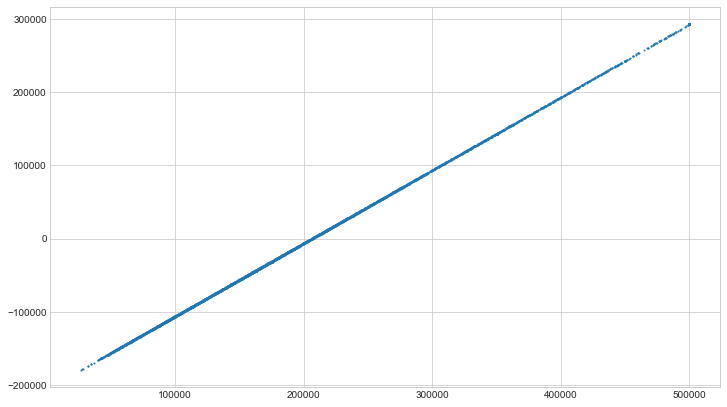

In [76]:
# Model 0
fig, ax = plt.subplots()
ax.scatter(y_test, residuals_0, s=1)
plt.show()

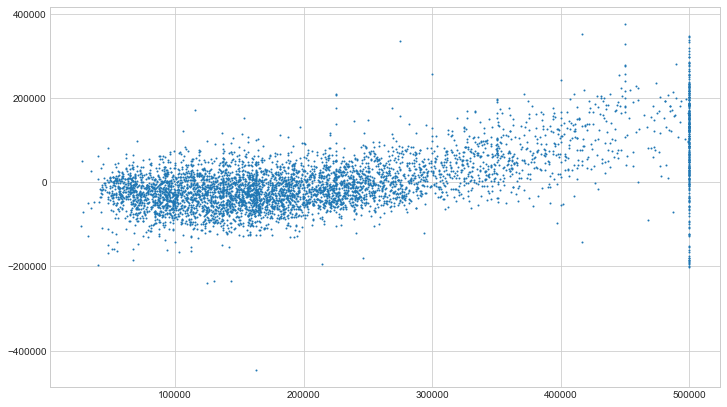

In [77]:
# Model 1
fig, ax = plt.subplots()
ax.scatter(y_test, residuals_1, s=1)
plt.show()

# Try another model

In [78]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

In [79]:
# Initiate and fit model 1
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [80]:
model_1.predict(X_test)

array([382829.12476011, 275008.69878523, 154075.76898951, ...,
       240287.83504296, 165926.86314872, 214294.64253093])

In [81]:
# Initiate and fit model 2
model_2 = RandomForestRegressor(n_estimators=100)
model_2.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
# Predict using RF
y_pred_2 = model_2.predict(X_test)

In [83]:
# Residuals of model 2
residuals_2 = y_test - y_pred_2

In [84]:
# Model 1 RMSE (Linear Reg)
np.sqrt(mean_squared_error(y_test, y_pred_1))

67819.28235577866

In [85]:
# Model 2 RMSE (RF)
np.sqrt(mean_squared_error(y_test, y_pred_2))

49918.82007958032

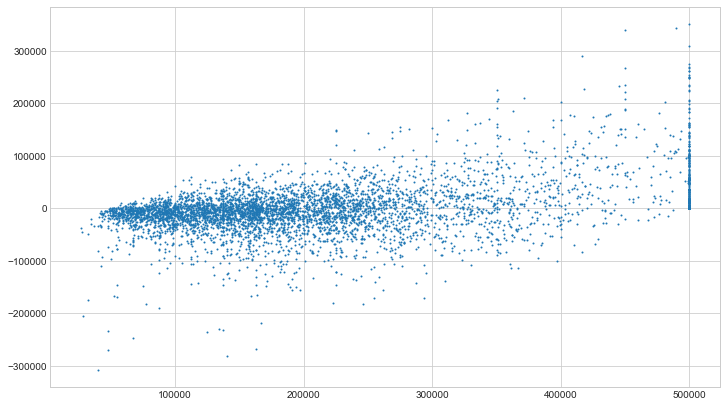

In [86]:
# Residuals
fig, ax = plt.subplots()
ax.scatter(y_test, residuals_2, s=1)
plt.show()

- Load, inspect
- EDA
- Clean, preprocess before model building
- Modeling:
    - Select a model: linear reg, RF, ...
    - Split train, test
    - Fit
    - Make prediction
    - Evaluate: RMSE
    - Pick

- Linear Algebra
- Calculus (I, II, III) partial differential equation
- Probability and stats